## F-score

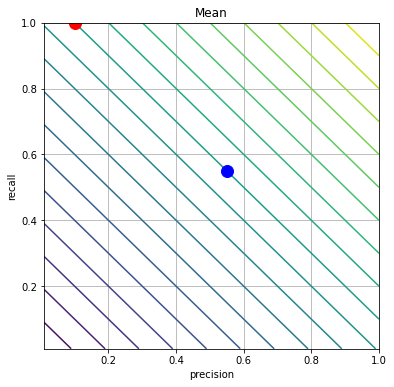

In [1]:
import matplotlib.pyplot as plt
import numpy as np


precisions, recalls = np.meshgrid(np.linspace(0.01, 1, 100), np.linspace(0.01, 1, 100))

mean_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        mean_levels[i, j] = 1/2 * (precisions[i, j] + recalls[i, j])
        
plt.figure(figsize = (6, 6))
plt.title('Mean')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, mean_levels, levels = 20)
plt.plot(0.1, 1, 'ro', ms = 12)
plt.plot(0.55, 0.55, 'bo', ms = 12);

|  <empty>   | red | blue |
--- | --- | ---
| precision  |   0.1    |   0.55   |
| recall |   1    |   0.55   |
| **mean** |   0.55    |   0.55   |

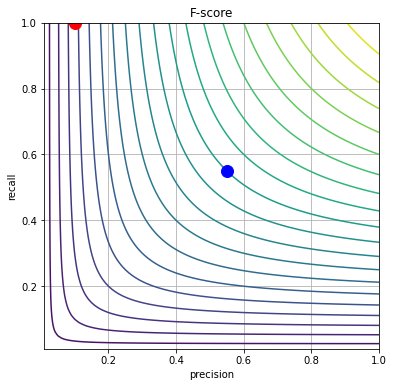

In [2]:
f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = 2 * precisions[i, j] * recalls[i, j] / (precisions[i, j] + recalls[i, j])

plt.figure(figsize = (6, 6))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels = 20)
plt.plot(0.1, 1, 'ro', ms = 12)
plt.plot(0.55, 0.55, 'bo', ms = 12);

|  <empty>   | red | blue |
--- | --- | --- 
| precision  |   0.1    |   0.55   |
| recall |   1    |   0.55   | 
| **f-score** |   0.1818   |   0.55   | 

$$ F_{\beta} = (1+ \beta^2) \cdot \frac{precision \: \cdot \: recall}{(\beta^2 \cdot precision) \: + \: recall}$$

If $\beta$ = 1 and the effects of precision and completeness are the same.<br>If $\beta$ > 1 - bias towards precision.<br>If 0 < $\beta$ < 1 - bias towards precision

In [3]:
beta = 100
p = 0.02
r = 0.7
(1 + beta ** 2) * p * r / (beta ** 2 * p + r)

0.6976283009466867

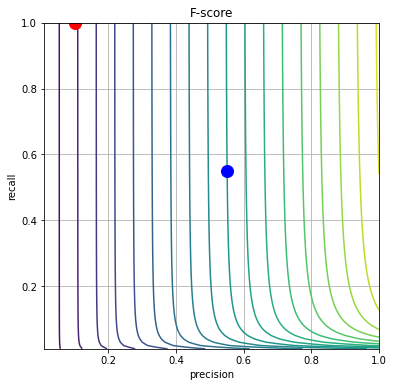

In [4]:
beta = 0.1
f_levels = np.empty_like(precisions)
for i in range(precisions.shape[0]):
    for j in range(precisions.shape[1]):
        f_levels[i, j] = (1 + beta) * precisions[i, j] * recalls[i, j] / \
                         (beta**2 * precisions[i, j] + recalls[i, j])

plt.figure(figsize = (6, 6))        
plt.title('F-score')
plt.xlabel('precision')
plt.ylabel('recall')
plt.grid()
plt.contour(precisions, recalls, f_levels, levels = 20)
plt.plot(0.1, 1, 'ro', ms = 12)
plt.plot(0.55, 0.55, 'bo', ms = 12);

## Feature generation

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
PREP_DATASET_PATH = './data/training_project/training_project_data_prep.csv'

In [7]:
df = pd.read_csv(PREP_DATASET_PATH)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                               test_size = 0.2,
                               shuffle = True,
                               stratify = df['NEXT_MONTH_DEFAULT'],
                               random_state = 12)

_______________
Generation of new features
    1. Categorical features
        * ordinal numbers
        * pd.get_dummies
        * Feature Encoding
        * Target Encoding
    2. Feature discretization
        * Feature discretization
        * Feature binarization

In [9]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,168182.000000,1.606800,1.860400,1.55610,35.39600,0.059200,-0.014600,-0.040800,-0.088100,-0.128900,...,0.106400,0.011700,0.339800,0.5601,0.089400,0.010700,0.358500,0.53940,0.092700,0.009400
std,130118.668771,0.488485,0.790047,0.51815,9.19536,0.946248,1.008706,0.984699,0.926944,0.881568,...,0.308364,0.107537,0.473665,0.4964,0.285335,0.102891,0.479584,0.49847,0.290026,0.096502
min,10000.000000,1.000000,1.000000,1.00000,21.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.00000,28.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.00000,34.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.00000,41.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.0000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.00000,75.00000,3.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Categorical features

1 = married, 2 = single, 3 = else

In [10]:
train['MARRIAGE'].value_counts()

2    4261
1    3649
3      90
Name: MARRIAGE, dtype: int64

In [11]:
def marriage_to_default():
    train, test = train_test_split(df,
                                   test_size = 0.2,
                                   shuffle = True,
                                   stratify = df['NEXT_MONTH_DEFAULT'],
                                   random_state = 12)
    train.replace({
        'MARRIAGE': {
            2: 'single', 
            1: 'married', 
            3: 'else'
        }
    }, inplace = True)

    test.replace({
        'MARRIAGE': {
            2: 'single', 
            1: 'married', 
            3: 'else'
        }
    }, inplace = True)
    
    return train, test

In [12]:
train, test = marriage_to_default()

In [13]:
train['MARRIAGE'].value_counts()

single     4261
married    3649
else         90
Name: MARRIAGE, dtype: int64

**1) Conversion to ordinal numbers**

In [14]:
# !BUT it is not advisable to transform non-order categories in this way 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['MARRIAGE'] = le.fit_transform(train['MARRIAGE'])
test['MARRIAGE'] = le.transform(test['MARRIAGE'])

train['MARRIAGE'].value_counts()

2    4261
1    3649
0      90
Name: MARRIAGE, dtype: int64

In [15]:
# this is how ordinal categories can be transformed

le1 = LabelEncoder()
train['EDUCATION'] = le1.fit_transform(train['EDUCATION'])
test['EDUCATION'] = le1.transform(test['EDUCATION'])

train['EDUCATION'].value_counts()

1    3714
0    2810
2    1359
4      69
3      34
5      14
Name: EDUCATION, dtype: int64

**2) Binary (dummy) variables/ OneHotEncoding**

In [16]:
train, test = marriage_to_default()

In [17]:
pd.get_dummies(train['MARRIAGE'])

,else,married,single
6042,0,1,0
1067,0,0,1
5719,0,1,0
4757,0,0,1
3147,0,0,1
...,...,...,...
9194,0,0,1
8891,0,0,1
5885,0,1,0
4802,0,1,0


In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
ohe.fit_transform(train['MARRIAGE'].values.reshape(-1, 1))

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
ohe = OneHotEncoder()
matrix = ohe.fit_transform(train['MARRIAGE'].values.reshape(-1, 1))
matrix = pd.DataFrame.sparse.from_spmatrix(matrix)
matrix

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
7995,0.0,0.0,1.0
7996,0.0,0.0,1.0
7997,0.0,1.0,0.0
7998,0.0,1.0,0.0


**3) Feature encoding**

In [20]:
df_cat = train.groupby('MARRIAGE', as_index = False).median()[['MARRIAGE', 'AGE']]
df_cat = pd.DataFrame(df_cat)

df_cat

,MARRIAGE,AGE
0,else,43
1,married,39
2,single,29


**4) Target encoding**

In [21]:
df_cat = train.groupby('MARRIAGE', as_index = False).mean()[['MARRIAGE', 'NEXT_MONTH_DEFAULT']]
df_cat = pd.DataFrame(df_cat)

df_cat

,MARRIAGE,NEXT_MONTH_DEFAULT
0,else,0.333333
1,married,0.231022
2,single,0.207228


In [22]:
y_onehot = pd.get_dummies(train['NEXT_MONTH_DEFAULT'])
temp_train = pd.concat([train, y_onehot], axis = 1)
temp_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,0,1
6042,50000.0,2,3,married,42,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1067,80000.0,1,2,single,48,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5719,300000.0,2,1,married,56,1,-1,-1,-1,-1,...,1,0,0,0,1,0,0,0,0,1
4757,50000.0,2,2,single,22,0,-1,-1,0,0,...,0,1,0,0,0,1,0,0,1,0
3147,150000.0,1,1,single,33,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [23]:
for label in y_onehot.columns:    
    temp = temp_train.groupby('MARRIAGE', as_index = False).mean()[['MARRIAGE', label]]
    print(temp)
    temp.columns = ['MARRIAGE', f'NEXT_MONTH_DEFAULT_{label}']
    train = train.merge(temp, on = 'MARRIAGE', how = 'left')

  MARRIAGE         0
0     else  0.666667
1  married  0.768978
2   single  0.792772
  MARRIAGE         1
0     else  0.333333
1  married  0.231022
2   single  0.207228


In [24]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,NEXT_MONTH_DEFAULT_0,NEXT_MONTH_DEFAULT_1
0,50000.0,2,3,married,42,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0.768978,0.231022
1,80000.0,1,2,single,48,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0.792772,0.207228
2,300000.0,2,1,married,56,1,-1,-1,-1,-1,...,1,0,0,0,1,0,0,0,0.768978,0.231022
3,50000.0,2,2,single,22,0,-1,-1,0,0,...,0,1,0,0,0,1,0,0,0.792772,0.207228
4,150000.0,1,1,single,33,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0.792772,0.207228


### Physical features 

**1) Feature discretization**

In [25]:
train['AGE'].describe()

count    8000.00000
mean       35.41225
std         9.18065
min        21.00000
25%        28.00000
50%        34.00000
75%        41.00000
max        72.00000
Name: AGE, dtype: float64

In [26]:
train_age_max = train['AGE'].max()

def age_to_cat(X):
    bins = [0, 25, 40, 60, train_age_max]
    X['age_cat'] = pd.cut(X['AGE'], bins = bins, labels = False)
    
    X['age_cat'].fillna(-1, inplace = True)
    return X

In [27]:
age_to_cat(train).head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,NEXT_MONTH_DEFAULT_0,NEXT_MONTH_DEFAULT_1,age_cat
0,50000.0,2,3,married,42,0,0,0,0,0,...,1,0,0,0,1,0,0,0.768978,0.231022,2
1,80000.0,1,2,single,48,0,0,0,0,0,...,1,0,0,0,1,0,0,0.792772,0.207228,2
2,300000.0,2,1,married,56,1,-1,-1,-1,-1,...,0,0,0,1,0,0,0,0.768978,0.231022,2
3,50000.0,2,2,single,22,0,-1,-1,0,0,...,1,0,0,0,1,0,0,0.792772,0.207228,0
4,150000.0,1,1,single,33,0,0,0,0,0,...,1,0,0,0,1,0,0,0.792772,0.207228,1


**2) Feature binarization**

In [28]:
train['LIMIT_BAL'].describe()

count       8000.000000
mean      168292.500000
std       130508.288991
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [29]:
train['small_limit_bal'] = (train['LIMIT_BAL'] > 140000).astype('int64')
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,NEXT_MONTH_DEFAULT_0,NEXT_MONTH_DEFAULT_1,age_cat,small_limit_bal
0,50000.0,2,3,married,42,0,0,0,0,0,...,0,0,0,1,0,0,0.768978,0.231022,2,0
1,80000.0,1,2,single,48,0,0,0,0,0,...,0,0,0,1,0,0,0.792772,0.207228,2,0
2,300000.0,2,1,married,56,1,-1,-1,-1,-1,...,0,0,1,0,0,0,0.768978,0.231022,2,1
3,50000.0,2,2,single,22,0,-1,-1,0,0,...,0,0,0,1,0,0,0.792772,0.207228,0,0
4,150000.0,1,1,single,33,0,0,0,0,0,...,0,0,0,1,0,0,0.792772,0.207228,1,1


**Generating features based on logic**

**Automatic feature generation**

In [30]:
import featuretools as ft
import featuretools.variable_types as vtypes

**Train**

In [31]:
# creating and entity set 'es'

es = ft.EntitySet(id = 'Credits')
es

Entityset: Credits
  Entities:
  Relationships:
    No relationships

In [32]:
train['Id'] = train.index
test['Id'] = test.index

In [33]:
# adding a dataframe

cols = ['Id', 'LIMIT_BAL', 'AGE', 'MARRIAGE']
es.entity_from_dataframe(entity_id = 'Clients',
                         dataframe = train[cols],
                         index = 'Id')

Entityset: Credits
  Entities:
    Clients [Rows: 8000, Columns: 4]
  Relationships:
    No relationships

In [34]:
es["Clients"].variables

[<Variable: Id (dtype = index)>,
 <Variable: LIMIT_BAL (dtype = numeric)>,
 <Variable: AGE (dtype = numeric)>,
 <Variable: MARRIAGE (dtype = categorical)>]

In [35]:
variable_types = {'MARRIAGE': vtypes.Categorical}

es.entity_from_dataframe(entity_id = 'Clients',
                         dataframe = train[cols],
                         index = 'Id',
                         variable_types = variable_types)

es['Clients'].variables

[<Variable: Id (dtype = index)>,
 <Variable: LIMIT_BAL (dtype = numeric)>,
 <Variable: AGE (dtype = numeric)>,
 <Variable: MARRIAGE (dtype = categorical)>]

In [36]:
es = es.normalize_entity(base_entity_id = 'Clients', new_entity_id = 'AGE', index = 'AGE')
es = es.normalize_entity(base_entity_id = 'Clients', new_entity_id = 'MARRIAGE', index = 'MARRIAGE')
es

Entityset: Credits
  Entities:
    Clients [Rows: 8000, Columns: 4]
    AGE [Rows: 51, Columns: 1]
    MARRIAGE [Rows: 3, Columns: 1]
  Relationships:
    Clients.AGE -> AGE.AGE
    Clients.MARRIAGE -> MARRIAGE.MARRIAGE

In [37]:
feature_matrix, feature_names = ft.dfs(entityset = es, 
                                       target_entity = 'Clients',
                                       verbose = 3)

Built 21 features
Elapsed: 00:00 | Progress: 100%|██████████


In [38]:
train[cols].head()

,Id,LIMIT_BAL,AGE,MARRIAGE
0,0,50000.0,42,married
1,1,80000.0,48,single
2,2,300000.0,56,married
3,3,50000.0,22,single
4,4,150000.0,33,single


In [39]:
feature_matrix.head()

,LIMIT_BAL,AGE,MARRIAGE,AGE.COUNT(Clients),AGE.MAX(Clients.LIMIT_BAL),AGE.MEAN(Clients.LIMIT_BAL),AGE.MIN(Clients.LIMIT_BAL),AGE.MODE(Clients.MARRIAGE),AGE.NUM_UNIQUE(Clients.MARRIAGE),AGE.SKEW(Clients.LIMIT_BAL),...,AGE.SUM(Clients.LIMIT_BAL),MARRIAGE.COUNT(Clients),MARRIAGE.MAX(Clients.LIMIT_BAL),MARRIAGE.MEAN(Clients.LIMIT_BAL),MARRIAGE.MIN(Clients.LIMIT_BAL),MARRIAGE.MODE(Clients.AGE),MARRIAGE.NUM_UNIQUE(Clients.AGE),MARRIAGE.SKEW(Clients.LIMIT_BAL),MARRIAGE.STD(Clients.LIMIT_BAL),MARRIAGE.SUM(Clients.LIMIT_BAL)
Id,,,,,,,,,,,,,,,,,,,,,
0,50000.0,42,married,205,500000.0,190926.829268,10000.0,married,3,0.575702,...,39140000.0,3649,1000000.0,182803.507810,10000.0,39,51,0.895110,135207.990479,667050000.0
1,80000.0,48,single,113,500000.0,155398.230088,10000.0,married,3,1.258788,...,17560000.0,4261,750000.0,157366.815302,10000.0,27,45,1.092951,125333.597731,670540000.0
2,300000.0,56,married,48,730000.0,129375.000000,10000.0,married,3,2.131119,...,6210000.0,3649,1000000.0,182803.507810,10000.0,39,51,0.895110,135207.990479,667050000.0
3,50000.0,22,single,160,120000.0,35562.500000,10000.0,single,2,1.028035,...,5690000.0,4261,750000.0,157366.815302,10000.0,27,45,1.092951,125333.597731,670540000.0
4,150000.0,33,single,312,520000.0,194775.641026,10000.0,single,2,0.740727,...,60770000.0,4261,750000.0,157366.815302,10000.0,27,45,1.092951,125333.597731,670540000.0


In [40]:
display(train[train.AGE == 42].count()[0],
        train[train.AGE == 42].LIMIT_BAL.max(),
        train[train.AGE == 42].LIMIT_BAL.mean())

205

500000.0

190926.82926829267

In [41]:
display(train[train.MARRIAGE == 'married'].count()[0],
        train[train.MARRIAGE == 'married'].LIMIT_BAL.max(),
        train[train.MARRIAGE == 'married'].LIMIT_BAL.mean())

3649

1000000.0

182803.507810359

In [42]:
feature_matrix_enc, features_enc = ft.encode_features(feature_matrix, feature_names, include_unknown = False)

In [43]:
feature_matrix_enc

,LIMIT_BAL,AGE = 27,AGE = 29,AGE = 30,AGE = 28,AGE = 31,AGE = 26,AGE = 25,AGE = 33,AGE = 35,...,MARRIAGE.MAX(Clients.LIMIT_BAL),MARRIAGE.MEAN(Clients.LIMIT_BAL),MARRIAGE.MIN(Clients.LIMIT_BAL),MARRIAGE.MODE(Clients.AGE) = 27,MARRIAGE.MODE(Clients.AGE) = 39,MARRIAGE.MODE(Clients.AGE) = 34,MARRIAGE.NUM_UNIQUE(Clients.AGE),MARRIAGE.SKEW(Clients.LIMIT_BAL),MARRIAGE.STD(Clients.LIMIT_BAL),MARRIAGE.SUM(Clients.LIMIT_BAL)
Id,,,,,,,,,,,,,,,,,,,,,
0,50000.0,False,False,False,False,False,False,False,False,False,...,1000000.0,182803.507810,10000.0,False,True,False,51,0.895110,135207.990479,667050000.0
1,80000.0,False,False,False,False,False,False,False,False,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
2,300000.0,False,False,False,False,False,False,False,False,False,...,1000000.0,182803.507810,10000.0,False,True,False,51,0.895110,135207.990479,667050000.0
3,50000.0,False,False,False,False,False,False,False,False,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
4,150000.0,False,False,False,False,False,False,False,True,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,280000.0,False,False,False,False,False,False,False,False,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
7996,220000.0,False,False,False,False,False,False,False,False,False,...,750000.0,157366.815302,10000.0,True,False,False,45,1.092951,125333.597731,670540000.0
7997,200000.0,False,False,False,False,False,False,False,False,False,...,1000000.0,182803.507810,10000.0,False,True,False,51,0.895110,135207.990479,667050000.0


In [44]:
train_featured = feature_matrix_enc.copy()
train_featured.shape

(8000, 35)

**Test**

In [45]:
# creating and entity set 'es'

es_tst = ft.EntitySet(id = 'Credits')

# adding a dataframe 

es_tst.entity_from_dataframe(entity_id = 'Clients', dataframe = test[cols], index = 'Id')

es_tst = es_tst.normalize_entity(base_entity_id = 'Clients', new_entity_id = 'AGE', index = 'AGE')
es_tst = es_tst.normalize_entity(base_entity_id = 'Clients', new_entity_id = 'MARRIAGE', index = 'MARRIAGE')
es_tst

Entityset: Credits
  Entities:
    Clients [Rows: 2000, Columns: 4]
    AGE [Rows: 50, Columns: 1]
    MARRIAGE [Rows: 3, Columns: 1]
  Relationships:
    Clients.AGE -> AGE.AGE
    Clients.MARRIAGE -> MARRIAGE.MARRIAGE

In [46]:
feature_matrix_tst = ft.calculate_feature_matrix(features=features_enc, entityset=es_tst)
feature_matrix_tst

,LIMIT_BAL,AGE = 27,AGE = 29,AGE = 30,AGE = 28,AGE = 31,AGE = 26,AGE = 25,AGE = 33,AGE = 35,...,MARRIAGE.MAX(Clients.LIMIT_BAL),MARRIAGE.MEAN(Clients.LIMIT_BAL),MARRIAGE.MIN(Clients.LIMIT_BAL),MARRIAGE.MODE(Clients.AGE) = 27,MARRIAGE.MODE(Clients.AGE) = 39,MARRIAGE.MODE(Clients.AGE) = 34,MARRIAGE.NUM_UNIQUE(Clients.AGE),MARRIAGE.SKEW(Clients.LIMIT_BAL),MARRIAGE.STD(Clients.LIMIT_BAL),MARRIAGE.SUM(Clients.LIMIT_BAL)
Id,,,,,,,,,,,,,,,,,,,,,
1699,30000.0,False,False,False,False,False,False,False,False,False,...,630000.0,187783.964365,10000.0,False,True,False,50,0.766608,132675.453717,168630000.0
4292,420000.0,False,False,False,False,False,False,False,False,False,...,630000.0,187783.964365,10000.0,False,True,False,50,0.766608,132675.453717,168630000.0
8070,20000.0,False,False,False,False,False,False,True,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
7183,80000.0,False,False,False,False,False,False,False,False,False,...,630000.0,187783.964365,10000.0,False,True,False,50,0.766608,132675.453717,168630000.0
6527,140000.0,False,False,True,False,False,False,False,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,440000.0,False,False,False,False,False,False,False,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
3934,80000.0,False,True,False,False,False,False,False,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
796,50000.0,False,False,False,False,False,False,True,False,False,...,620000.0,152804.428044,10000.0,False,False,False,44,1.039177,123234.623492,165640000.0
